В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [57]:
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

In [58]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [8]:
X_with_intercept.shape

(1064, 2)

# МНК

In [5]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [7]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [9]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [10]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

In [11]:
rmse_mnk = root_mean_squared_error(y, predictions_MNK)
rmse_mnk

4662.505766636395

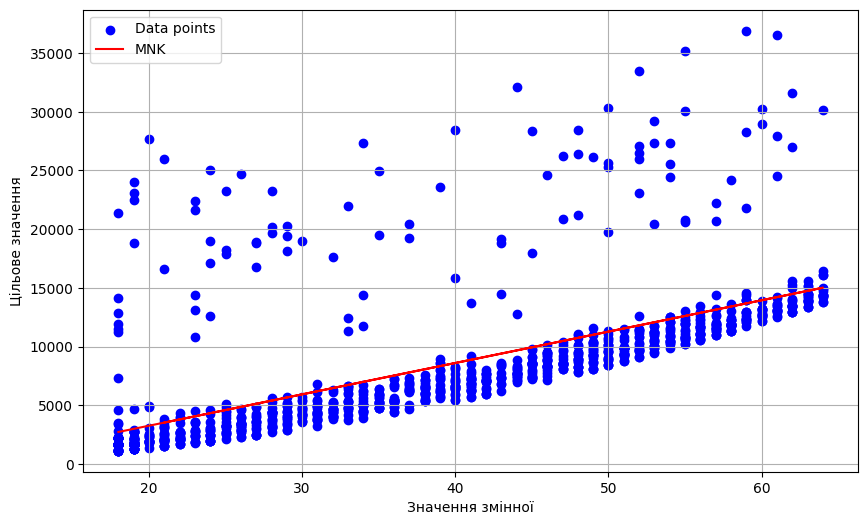

In [12]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

# Градієнтний спуск

In [79]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:,1] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:,1])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [80]:
m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=0.000001, epochs=1000)
predictions_fbgd = m * X_with_intercept[:,1] + b

m, b

(np.float64(213.45756906581036), np.float64(4.331249162394349))

In [81]:
root_mean_squared_error(y, predictions_fbgd)

4723.647721473958

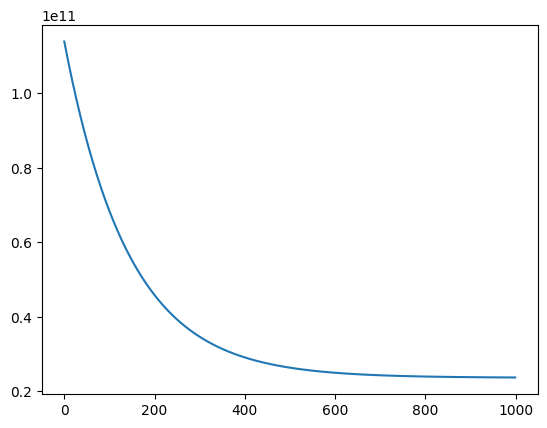

In [82]:
plt.plot(range(1000),errors)

In [105]:
m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * X_with_intercept[:,1] + b

print("m:",m,"b:", b)

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd)
rmse_fbgd


m: 221.1045843794301 b: -41.98126853149977


4713.250582815521

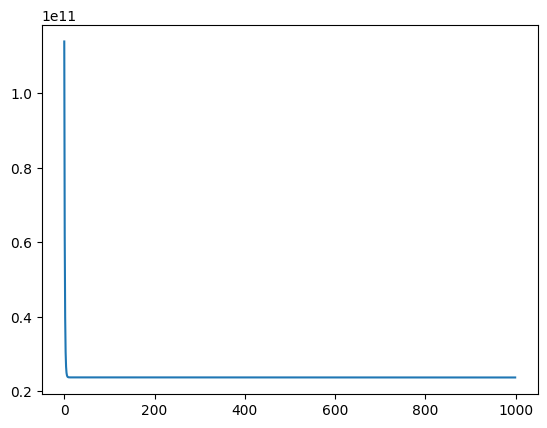

In [91]:
plt.plot(range(1000),errors)

In [104]:
m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=0.00001, epochs=1000)
predictions_fbgd = m * X_with_intercept[:,1] + b

print("m:",m,"b:", b)

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd)
rmse_fbgd

m: 220.15455551129122 b: 0.2130065279986346


4715.349750127827

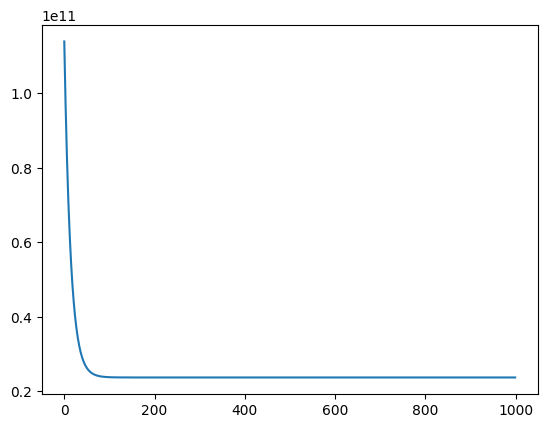

In [86]:
plt.plot(range(1000),errors)

# scikit

In [92]:
from sklearn.linear_model import LinearRegression

In [96]:
lin_reg = LinearRegression()
lin_reg.fit(X_with_intercept, y)
lin_reg.coef_, lin_reg.intercept_

(array([  0.        , 267.24891283]), np.float64(-2091.4205565650827))

In [97]:
predictions_sklearn = lin_reg.predict(X_with_intercept)

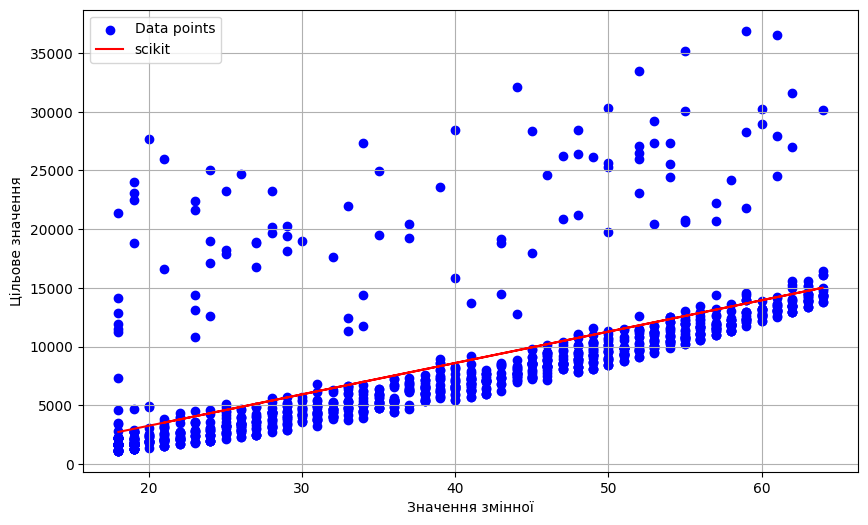

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_sklearn, color='red', label='scikit')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

# Plot all

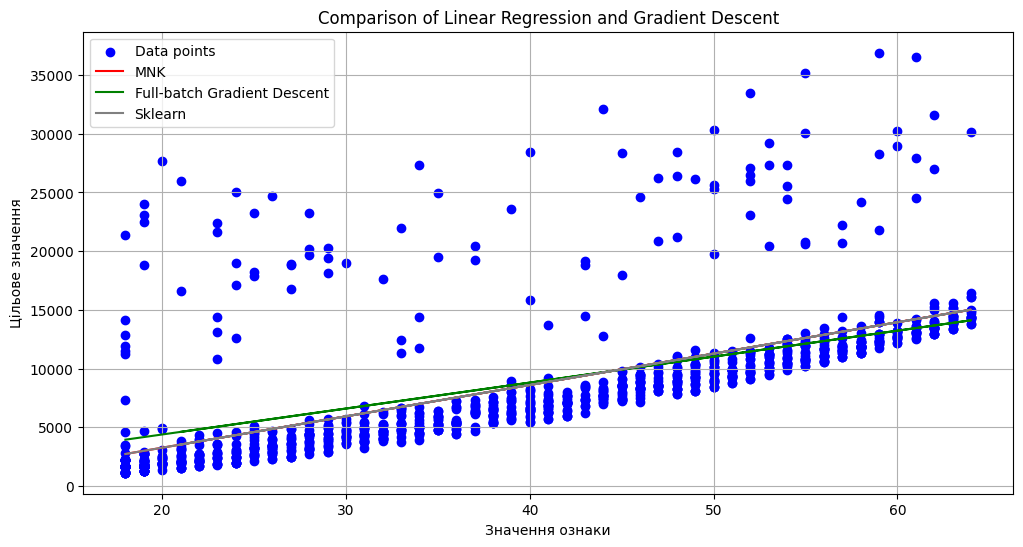

In [99]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X_with_intercept[:, 1], y, color='blue', label='Data points')
plt.plot(X_with_intercept[:, 1], predictions_MNK, color='red', label='MNK')
plt.plot(X_with_intercept[:, 1], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X_with_intercept[:, 1], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з стохаст. град. спуску:  -41.98126853149977 221.1045843794301
Коефіцієнти з sklearn:  -2091.4205565650827 [  0.         267.24891283]


In [109]:
print('RMSE МНК: ', rmse_mnk)
print('RMSE град. спуску: ', rmse_fbgd)
rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4713.250582815521
RMSE sklearn:  4662.505766636395


**Висновки**

МНК та scikit-learn.LinearRegression, по суті показали ті самі результати, що було очікувано оскільки scikit використовує МНК в своїй функції. Градієнтний спуск отримав інші значення, хоч і помилка не надто сильно відрізняється від інших двох - напевно треба ще побвитись з learning_rate та кількістю епох.




 # **Завдання 2.**

 Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?